# Задача 3 <br>
Выполнила: Борисова Мария, 120М группа

Задание: По табличным данным построить распределение объектов по размерам.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузка данных

In [2]:
l = []
with open('i-1572__i3d.txt', 'r') as file:
    l = file.read().split('\n')

In [3]:
l = [i.split(',') for i in l]
name_columns = [l[4][i]+' '+ l[5][i] for i in range(37)]
list_for_df = l[6:].copy()
name_columns

[' ',
 'Obj.V mm^3',
 'Obj.S mm^2',
 'Po.V mm^3',
 'Po.S mm^2',
 'Po %',
 'Po.N ',
 'Crd.X mm',
 'Crd.Y mm',
 'Crd.Z mm',
 'MMI(x) mm^5',
 'MMI(y) mm^5',
 'MMI(z) mm^5',
 'MMI(polar) mm^5',
 'Gr.R(x) mm',
 'Gr.R(y) mm',
 'Gr.R(z) mm',
 'Gr.R(polar) mm',
 'Pr.In(xy) mm^5',
 'Pr.In(xz) mm^5',
 'Pr.In(yz) mm^5',
 'Or(theta) °',
 'Or(phi) °',
 'SMI ',
 'St.Th mm',
 'ERL mm',
 'Maj.Dm mm',
 'ESDv mm',
 'ESDs mm',
 'Sau.Dm mm',
 'Sph ',
 'Dens Index',
 'Dens(max) Index',
 'SCv.I 1/mm',
 'Eu.N ',
 'Conn ',
 ' ']

In [5]:
df = pd.DataFrame(list_for_df, columns=name_columns, dtype='float')
df.info()

C:\Users\Маша\AppData\Local\Temp\ipykernel_8032\4037753543.py:1: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  df = pd.DataFrame(list_for_df, columns=name_columns, dtype='float')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162298 entries, 0 to 162297
Data columns (total 37 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0                    162298 non-null  object 
 1   Obj.V mm^3       162297 non-null  float64
 2   Obj.S mm^2       162297 non-null  float64
 3   Po.V mm^3        162297 non-null  float64
 4   Po.S mm^2        162297 non-null  float64
 5   Po %             162297 non-null  float64
 6   Po.N             162297 non-null  float64
 7   Crd.X mm         162297 non-null  float64
 8   Crd.Y mm         162297 non-null  float64
 9   Crd.Z mm         162297 non-null  float64
 10  MMI(x) mm^5      162297 non-null  float64
 11  MMI(y) mm^5      162297 non-null  float64
 12  MMI(z) mm^5      162297 non-null  float64
 13  MMI(polar) mm^5  162297 non-null  float64
 14  Gr.R(x) mm       162297 non-null  float64
 15  Gr.R(y) mm       162297 non-null  float64
 16  Gr.R(z) mm       162297 non-null  floa

Анализ и подготовка данных

In [6]:
df.columns

Index([' ', 'Obj.V mm^3', 'Obj.S mm^2', 'Po.V mm^3', 'Po.S mm^2', 'Po %',
       'Po.N ', 'Crd.X mm', 'Crd.Y mm', 'Crd.Z mm', 'MMI(x) mm^5',
       'MMI(y) mm^5', 'MMI(z) mm^5', 'MMI(polar) mm^5', 'Gr.R(x) mm',
       'Gr.R(y) mm', 'Gr.R(z) mm', 'Gr.R(polar) mm', 'Pr.In(xy) mm^5',
       'Pr.In(xz) mm^5', 'Pr.In(yz) mm^5', 'Or(theta) °', 'Or(phi) °', 'SMI ',
       'St.Th mm', 'ERL mm', 'Maj.Dm mm', 'ESDv mm', 'ESDs mm', 'Sau.Dm mm',
       'Sph ', 'Dens Index', 'Dens(max) Index', 'SCv.I 1/mm', 'Eu.N ', 'Conn ',
       ' '],
      dtype='object')

In [7]:
df.drop(columns = [' ', 'SMI ', 'St.Th mm', 'ERL mm', 'Maj.Dm mm', 'Dens Index', 'Dens(max) Index', 'SCv.I 1/mm', ' '], axis=1, inplace=True)
df = df.drop(index=[162297], axis=0)
df

,Obj.V mm^3,Obj.S mm^2,Po.V mm^3,Po.S mm^2,Po %,Po.N,Crd.X mm,Crd.Y mm,Crd.Z mm,MMI(x) mm^5,...,Pr.In(xz) mm^5,Pr.In(yz) mm^5,Or(theta) °,Or(phi) °,ESDv mm,ESDs mm,Sau.Dm mm,Sph,Eu.N,Conn
0,0.00732,0.21566,0.0,0.0,0.0,0.0,276.99365,242.06069,5.99859,0.00000,...,0.0,0.0,90.0,0.0,0.24093,0.26200,0.20372,0.84558,1.0,0.0
1,0.02929,0.56782,0.0,0.0,0.0,0.0,271.34792,242.94284,5.99859,0.00274,...,0.0,0.0,90.0,90.0,0.38245,0.42514,0.30949,0.80924,1.0,0.0
2,0.00732,0.21566,0.0,0.0,0.0,0.0,276.99365,242.76641,5.99859,0.00000,...,0.0,0.0,90.0,0.0,0.24093,0.26200,0.20372,0.84558,1.0,0.0
3,0.00732,0.21566,0.0,0.0,0.0,0.0,277.69936,242.76641,5.99859,0.00000,...,0.0,0.0,90.0,0.0,0.24093,0.26200,0.20372,0.84558,1.0,0.0
4,0.00732,0.21566,0.0,0.0,0.0,0.0,270.64220,243.11927,5.99859,0.00000,...,0.0,0.0,90.0,0.0,0.24093,0.26200,0.20372,0.84558,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162292,0.00732,0.21566,0.0,0.0,0.0,0.0,293.57798,543.04869,325.33522,0.00000,...,0.0,0.0,90.0,0.0,0.24093,0.26200,0.20372,0.84558,1.0,0.0
162293,0.00732,0.21566,0.0,0.0,0.0,0.0,294.28370,543.04869,325.33522,0.00000,...,0.0,0.0,90.0,0.0,0.24093,0.26200,0.20372,0.84558,1.0,0.0
162294,0.00732,0.21566,0.0,0.0,0.0,0.0,293.93084,543.40155,325.33522,0.00000,...,0.0,0.0,90.0,0.0,0.24093,0.26200,0.20372,0.84558,1.0,0.0
162295,0.00732,0.21566,0.0,0.0,0.0,0.0,295.34227,543.40155,325.33522,0.00000,...,0.0,0.0,90.0,0.0,0.24093,0.26200,0.20372,0.84558,1.0,0.0


In [8]:
df.describe()

,Obj.V mm^3,Obj.S mm^2,Po.V mm^3,Po.S mm^2,Po %,Po.N,Crd.X mm,Crd.Y mm,Crd.Z mm,MMI(x) mm^5,...,Pr.In(xz) mm^5,Pr.In(yz) mm^5,Or(theta) °,Or(phi) °,ESDv mm,ESDs mm,Sau.Dm mm,Sph,Eu.N,Conn
count,162297.000000,162297.000000,162297.000000,162297.000000,162297.000000,162297.000000,162297.000000,162297.000000,162297.000000,1.622970e+05,...,1.622970e+05,1.622970e+05,162297.000000,162297.000000,162297.000000,162297.000000,162297.000000,162297.000000,162297.000000,162297.000000
mean,3.293093,7.776440,0.000775,0.006079,0.000022,0.003241,391.621284,415.930584,158.751667,1.008828e+04,...,9.932473e+01,3.309349e+03,79.337742,45.569925,0.621652,0.732841,0.465257,0.814466,0.856430,0.146811
std,484.394728,703.528396,0.287061,2.267518,0.003049,1.169540,73.303117,118.053893,107.544726,4.036579e+06,...,4.055335e+04,1.333371e+06,23.071135,90.038966,0.867763,1.392218,0.552127,0.076806,36.510395,37.676053
min,0.007320,0.215660,0.000000,0.000000,0.000000,0.000000,189.131970,208.892030,5.998590,0.000000e+00,...,-8.761730e+04,-1.581991e+05,0.000000,0.000000,0.240930,0.262000,0.203720,0.057620,-14655.000000,0.000000
25%,0.007320,0.215660,0.000000,0.000000,0.000000,0.000000,363.443900,315.455190,42.695840,0.000000e+00,...,0.000000e+00,0.000000e+00,88.537810,0.000000,0.240930,0.262000,0.203720,0.809780,1.000000,0.000000
50%,0.007320,0.215660,0.000000,0.000000,0.000000,0.000000,406.492590,442.131260,165.490470,0.000000e+00,...,0.000000e+00,0.000000e+00,90.000000,0.000000,0.240930,0.262000,0.203720,0.845580,1.000000,0.000000
75%,0.062240,0.919980,0.000000,0.000000,0.000000,0.000000,427.134790,530.875090,254.587160,5.470000e-03,...,0.000000e+00,0.000000e+00,90.000000,45.000000,0.491690,0.541150,0.411280,0.845580,1.000000,0.000000
max,194886.323200,282131.041420,115.554580,913.213340,0.721600,471.000000,540.578690,560.338740,325.335220,1.626178e+09,...,1.633563e+07,5.371631e+08,90.000000,360.000000,71.932900,299.674990,5.785320,0.947810,2.000000,15127.000000


Построение распределения

Object volume = Obj.V mm^3 <br>
Volume-equivalent sphere diameter = ESDv mm

In [9]:
vol_sum = df['Obj.V mm^3'].sum()
vol_sum

534459.09493

In [13]:
df_cop = df.copy()
bin_diam = []
quantity_bin = []
volume_bin = []
for i in [0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0 , 10.0 , 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 72.0]:
    bin_diam += [i]
    quantity_bin += [df_cop['ESDv mm'][df_cop['ESDv mm'] <=i].value_counts().sum()]
    volume_bin += [df_cop['Obj.V mm^3'][df_cop['ESDv mm'] <=i].sum()*100/vol_sum]
    df_cop = df_cop.drop(index=df_cop[df_cop['ESDv mm'] <=i].index, axis=0)

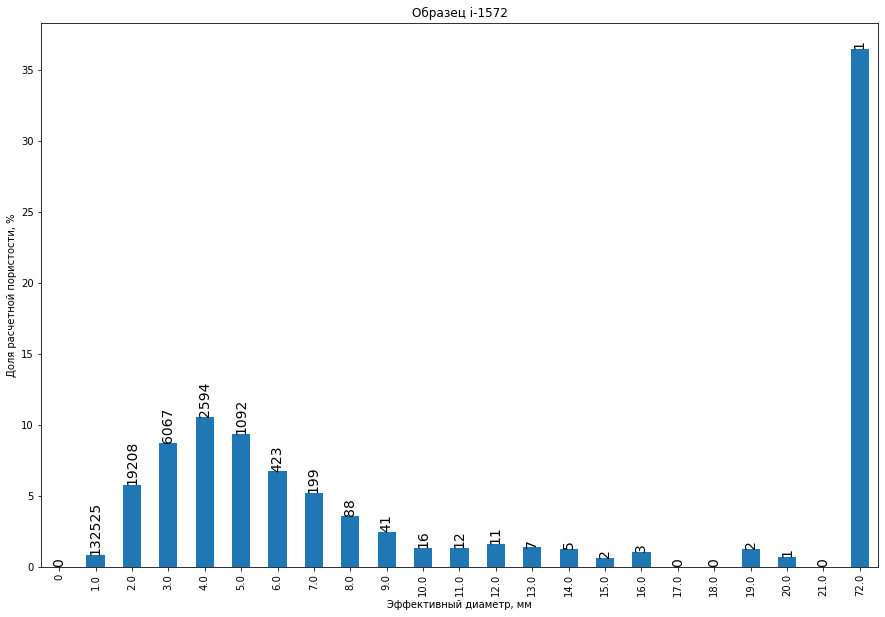

In [14]:
freq_series = pd.Series(volume_bin)

plt.figure(figsize=(15, 10))
ax = freq_series.plot(kind="bar")
ax.set_title('Образец i-1572')
ax.set_xlabel('Эффективный диаметр, мм')
ax.set_ylabel('Доля расчетной пористости, %')
ax.set_xticklabels(bin_diam)

rects = ax.patches


for rect, label in zip(rects, quantity_bin):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.005,
            label, 
            fontsize=14,
            color='black',
            ha='center',
            va='bottom',
           rotation=90)

plt.show()